<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327384 entries, 0 to 35703
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Id. Acidente                     327384 non-null  int64  
 1   Datahora                         327384 non-null  object 
 2   Dia                              327384 non-null  object 
 3   Mês                              327384 non-null  object 
 4   Hora                             327384 non-null  object 
 5   Entidades Fiscalizadoras         327384 non-null  object 
 6   Velocidade local                 324553 non-null  float64
 7   Velocidade geral                 327195 non-null  float64
 8   Dia da Semana                    327384 non-null  object 
 9   Latitude GPS                     294013 non-null  object 
 10  Longitude GPS                    293866 non-null  object 
 11  Num. Mortos a 30 dias            327384 non-null  int64  
 12  Num

In [ ]:
data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2010442610,2010:01:01 00:05:00,01/01/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,"38,93275",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,No passeio,Direita
1,2010442441,2010:01:01 00:30:00,01/01/00,01/01/00,01/01/00,Guarda Nacional Republicana,120.0,120.0,Sexta-Feira,"41,185697",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Curva,Com inclinação,Berma não pavimentada,Em plena via,Direita
2,2010422349,2010:01:01 00:35:00,01/01/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sexta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,No passeio,Direita
3,2010439194,2010:01:01 00:40:00,01/01/00,01/01/00,01/01/00,Guarda Nacional Republicana,70.0,90.0,Sexta-Feira,"40,701323",...,Inexistentes,NÃO DEFINIDO,Outros,A funcionar normalmente,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
4,2010442390,2010:01:01 00:40:00,01/01/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Na berma,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35699,20201824020,2019:12:31 19:40:00,01/31/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Terça-Feira,"41,307400",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Calçada,Curva,Em patamar,Berma pavimentada,Em plena via,Direita
35700,20201823691,2019:12:31 20:20:00,01/31/00,12/01/00,01/01/00,Guarda Nacional Republicana,80.0,80.0,Terça-Feira,"41,020800",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma não pavimentada,Na berma,Direita
35701,20201823606,2019:12:31 21:00:00,01/31/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Terça-Feira,"40,320440",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Na berma,Direita
35702,20201828784,2019:12:31 23:20:00,01/31/00,12/01/00,01/01/00,Guarda Nacional Republicana,120.0,120.0,Terça-Feira,"38,831420",...,Inexistentes,No sentido crescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita


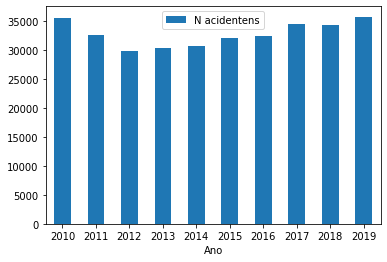

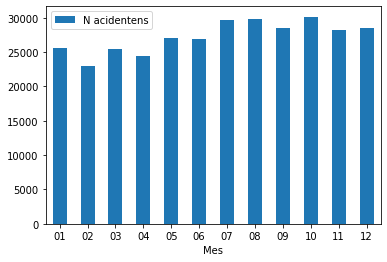

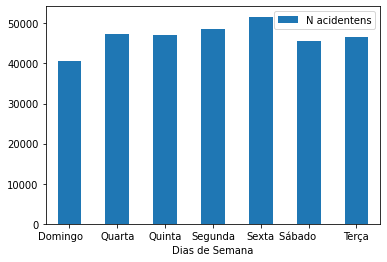

In [31]:
ano_groupby=data.groupby(data['Datahora'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0)

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Dia da Semana'].str.split('-').str[0])
df = pd.DataFrame({'Dias de Semana':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.bar(x='Dias de Semana', y='N acidentens', rot=0)









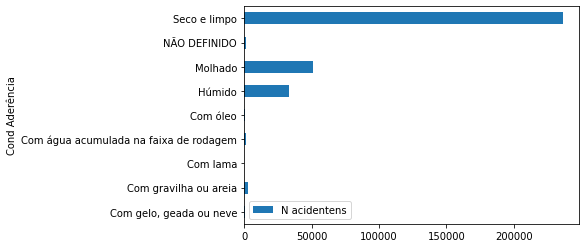

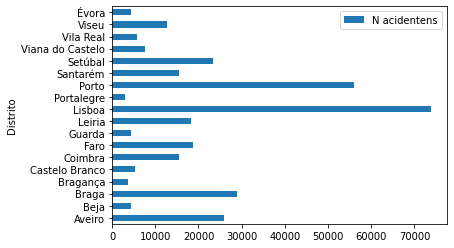

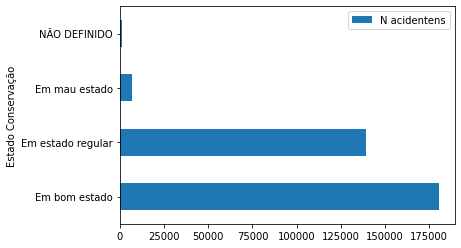

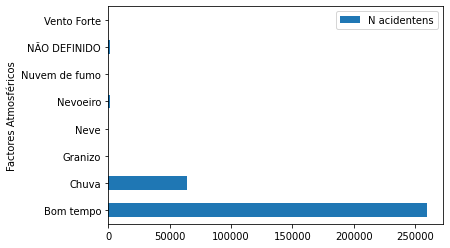

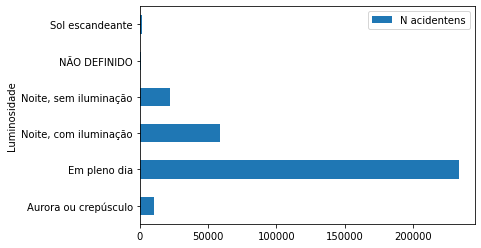

In [33]:
dia_semana_groupby=data.groupby(data['Cond Aderência'])
df = pd.DataFrame({'Cond Aderência':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.barh(x='Cond Aderência', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Distrito'])
df = pd.DataFrame({'Distrito':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.barh(x='Distrito', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Estado Conservação'])
df = pd.DataFrame({'Estado Conservação':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.barh(x='Estado Conservação', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Factores Atmosféricos'])
df = pd.DataFrame({'Factores Atmosféricos':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.barh(x='Factores Atmosféricos', y='N acidentens', rot=0)

dia_semana_groupby=data.groupby(data['Luminosidade'])
df = pd.DataFrame({'Luminosidade':dia_semana_groupby.groups.keys(), 'N acidentens':dia_semana_groupby.size()})
ax = df.plot.barh(x='Luminosidade', y='N acidentens', rot=0)

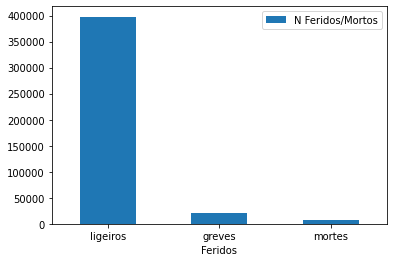

In [ ]:
feridos=['ligeiros', 'greves','mortes']
n_feridos=[]
n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
n_feridos.append(data['Num. Mortos a 30 dias'].sum())

df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)

In [ ]:
# data = data.sample(n=10000)
# data.to_csv('/accidents.csv')
#accidents.csv esta no git 

In [ ]:
#url="https://github.com/mrdso2-iscte/IAA_PROJECT/blob/main/accidents.csv"
data=pd.read_csv('accidents.csv', sep = ',')

In [ ]:
data=data.drop(['Unnamed: 0','Id. Acidente','Hora','Mês','Entidades Fiscalizadoras','Latitude GPS','Longitude GPS','Pov. Proxima','Nome arruamento','Cod Via'], axis=1)

In [ ]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [ ]:
data=data.rename(columns={"Datahora": "Hora"})

In [ ]:
data

,Hora,Dia,Velocidade local,Velocidade geral,Dia da Semana,Num. Mortos a 30 dias,Num. Feridos graves a 30 dias,Num. Feridos ligeiros a 30 dias,Características Tecnicas1,Cond Aderência,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,12:10:00,01/16/00,50.0,50.0,Quarta-Feira,0,1,0,Outra via,Seco e limpo,...,Inexistentes,No sentido crescente da quilometragem,Outros,A funcionar normalmente,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Esquerda
1,12:05:00,01/23/00,50.0,50.0,Sexta-Feira,0,0,1,Outra via,Seco e limpo,...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
2,12:45:00,01/16/00,50.0,50.0,Quinta-Feira,0,0,1,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda
3,09:15:00,01/22/00,50.0,50.0,Quarta-Feira,0,0,1,Outra via,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Direita
4,00:10:00,01/10/00,50.0,50.0,Segunda-Feira,0,0,1,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15:45:00,01/25/00,50.0,50.0,Quinta-Feira,0,0,2,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Na berma,Direita
9996,23:50:00,01/12/00,50.0,50.0,Domingo,0,0,1,Estrada sem separador,Húmido,...,Inexistentes,NÃO DEFINIDO,Passagem de peões,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9997,10:30:00,01/28/00,50.0,50.0,Quarta-Feira,0,0,1,Estrada sem separador,Molhado,...,Inexistentes,NÃO DEFINIDO,Passagem de peões,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9998,18:45:00,01/29/00,50.0,50.0,Segunda-Feira,0,0,2,Estrada sem separador,Seco e limpo,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,A funcionar normalmente,Betão de cimento,Recta,Em patamar,Berma pavimentada,Em plena via,Direita


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hora                             10000 non-null  object 
 1   Dia                              10000 non-null  object 
 2   Velocidade local                 9913 non-null   float64
 3   Velocidade geral                 9994 non-null   float64
 4   Dia da Semana                    10000 non-null  object 
 5   Num. Mortos a 30 dias            10000 non-null  int64  
 6   Num. Feridos graves a 30 dias    10000 non-null  int64  
 7   Num. Feridos ligeiros a 30 dias  10000 non-null  int64  
 8   Características Tecnicas1        10000 non-null  object 
 9   Cond Aderência                   10000 non-null  object 
 10  Distrito                         10000 non-null  object 
 11  Concelho                         10000 non-null  object 
 12  Freguesia          